In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [45]:
knn = pd.read_csv('AdultKNN.csv')

In [46]:
knn.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [47]:
knn = knn.replace({'?':np.nan})

In [48]:
knn.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [49]:
knn.shape

(48842, 15)

In [50]:
knn.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [51]:
knn.isnull().sum()[knn.isnull().sum()>0]

workclass         2799
occupation        2809
native-country     857
dtype: int64

In [52]:
knn['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [53]:
knn.workclass = knn.workclass.fillna('Private')

In [54]:
knn.occupation = knn.occupation.fillna('Prof-specialty')

In [55]:
knn['native-country'] = knn['native-country'].fillna('United-States')

In [56]:
knn.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [57]:
knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder()

In [60]:
knn[knn.select_dtypes(include=['object']).columns] = knn[knn.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [61]:
knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int32
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int32
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int32
 6   occupation       48842 non-null  int32
 7   relationship     48842 non-null  int32
 8   race             48842 non-null  int32
 9   gender           48842 non-null  int32
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int32
 14  income           48842 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 3.9 MB


In [62]:
knn['workclass'].value_counts()

workclass
3    36705
5     3862
1     3136
6     1981
4     1695
0     1432
7       21
2       10
Name: count, dtype: int64

In [63]:
knn['occupation'].value_counts()

occupation
9     8981
2     6112
3     6086
0     5611
11    5504
7     4923
6     3022
13    2355
5     2072
4     1490
12    1446
10     983
8      242
1       15
Name: count, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
knn_train, knn_test = train_test_split(knn, test_size=0.2)

In [66]:
knn_train_y = knn_train.iloc[:,-1]
knn_test_y = knn_test.iloc[:,-1]

In [67]:
knn_train_x = knn_train.iloc[:,:-1]
knn_test_x = knn_test.iloc[:,:-1]

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Trade-off b/w accuracy & stability to find the best value of k

In [69]:
acc = []
for k in range(1,51):
    adult_knn = KNeighborsClassifier(n_neighbors=k)
    adult_knn.fit(knn_train_x, knn_train_y)
    pred_knn = adult_knn.predict(knn_test_x)
    tab_knn = confusion_matrix(knn_test_y, pred_knn)
    acc.append(tab_knn.diagonal().sum()*100/ tab_knn.sum())

In [70]:
import matplotlib.pyplot as plt

In [71]:
k_values = list(range(1,51))

Text(0, 0.5, 'accuracy')

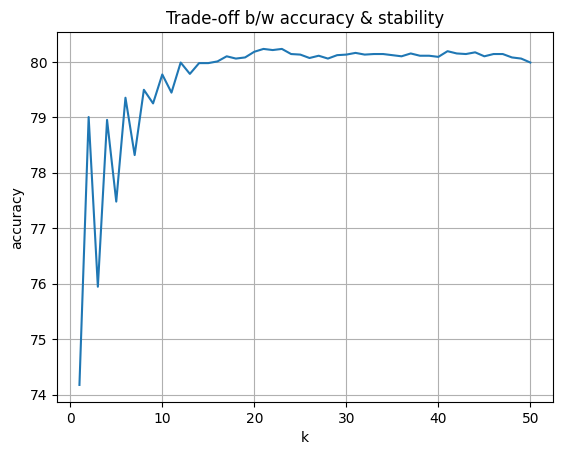

In [102]:
plt.plot(k_values, acc)
plt.grid()
plt.title('Trade-off b/w accuracy & stability')
plt.xlabel('k')
plt.ylabel('accuracy')

In [73]:
new_adult_knn = KNeighborsClassifier(n_neighbors=32)

In [74]:
new_adult_knn.fit(knn_train_x, knn_train_y)

KNeighborsClassifier(n_neighbors=32)

In [75]:
pred = new_adult_knn.predict(knn_test_x)
pred

array([0, 0, 1, ..., 0, 0, 0])

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [77]:
cm = confusion_matrix(knn_test_y, pred)
cm

array([[7357,   78],
       [1863,  471]], dtype=int64)

In [78]:
accuracy_score(knn_test_y, pred)*100

80.13102671716655

In [79]:
precision_score(knn_test_y, pred)*100

85.79234972677595

In [80]:
recall_score(knn_test_y, pred)*100

20.17994858611825

In [81]:
roc_auc_score(knn_test_y, pred)*100

59.56542822715461

In [82]:
pred_proba = new_adult_knn.predict_proba(knn_test_x)
pred_proba

array([[0.8125 , 0.1875 ],
       [0.875  , 0.125  ],
       [0.46875, 0.53125],
       ...,
       [0.9375 , 0.0625 ],
       [0.9375 , 0.0625 ],
       [0.75   , 0.25   ]])

In [83]:
fpr,tpr,thr = roc_curve(knn_test_y, pred_proba[:,1])

Text(0.5, 0.5, 'AUROC Score is 0.5956')

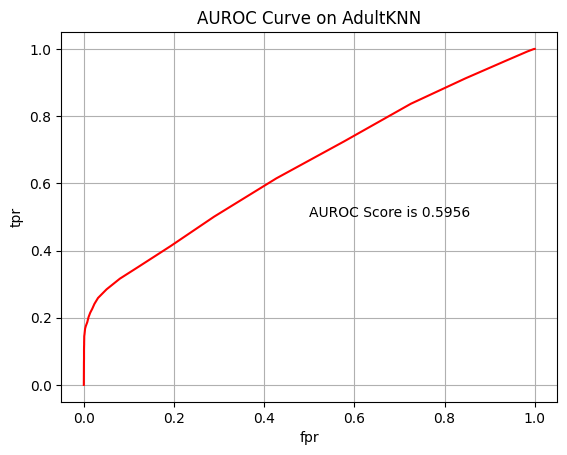

In [84]:
plt.plot(fpr,tpr,color='r')
plt.grid()
plt.title('AUROC Curve on AdultKNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.text(x=0.5,y=0.5,s='AUROC Score is 0.5956')

# Using GridSearchCV

In [85]:
dict1 = {'n_neighbors': list(range(1,51))}

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
grid = GridSearchCV(knc, dict1)

In [89]:
grid.fit(knn_train_x, knn_train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [90]:
pred = grid.predict(knn_test_x)
pred

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
cm = confusion_matrix(knn_test_y, pred)
cm

array([[7318,  117],
       [1824,  510]], dtype=int64)

In [92]:
accuracy_score(knn_test_y, pred)*100

80.13102671716655

In [93]:
grid.best_params_

{'n_neighbors': 25}

In [94]:
precision_score(knn_test_y, pred)*100

81.3397129186603

In [95]:
recall_score(knn_test_y, pred)*100

21.85089974293059

In [96]:
roc_auc_score(knn_test_y, pred)*100

60.138630772608536

In [97]:
pred_proba = grid.predict_proba(knn_test_x)
pred_proba

array([[0.76, 0.24],
       [0.84, 0.16],
       [0.4 , 0.6 ],
       ...,
       [0.96, 0.04],
       [0.92, 0.08],
       [0.68, 0.32]])

In [98]:
fpr,tpr,thr = roc_curve(knn_test_y, pred_proba[:,1])

Text(0.5, 0.5, 'AUROC Score is 0.6013')

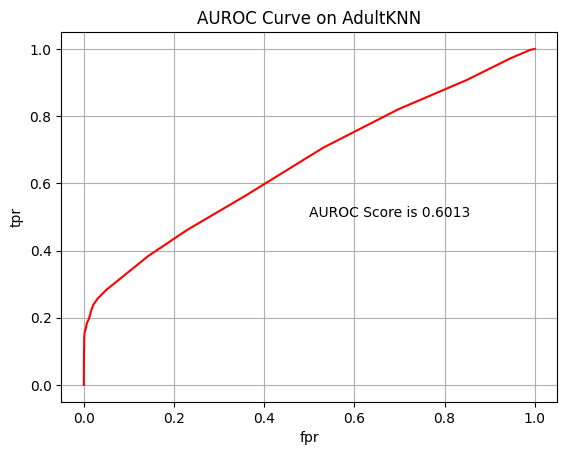

In [100]:
plt.plot(fpr,tpr,color='r')
plt.grid()
plt.title('AUROC Curve on AdultKNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.text(x=0.5,y=0.5,s='AUROC Score is 0.6013')